In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [4]:
def drop_columns(data):
    if 'Unnamed: 0' in data.columns:
        data = data.drop({'Unnamed: 0'},axis=1)
    
    if 'Unnamed: 0.1' in data.columns:
        data = data.drop({'Unnamed: 0.1'},axis=1)

    return data

Found few records that have different location but same datetime for the same user. Impossible right? unless he's glitching like lord loki :D

In [45]:
def remove_duplicates_time(data):
    df = data.copy()

    df['datetime_wib'] = pd.to_datetime(df['datetime_wib'])

    # Menghapus duplikat berdasarkan 'uid' dan 'datetime'
    df_no_duplicates = df.drop_duplicates(subset=['maid', 'datetime_wib'])

    # Menampilkan DataFrame hasil
    print("Number of points dropped: %d" %(len(data) - len(df_no_duplicates)))
    return df_no_duplicates

In [63]:
path = './DataGPS_Malioboro/filter2_malioboro_des.csv'
temp = pd.read_csv(path)
df = temp.copy()
df.drop_duplicates()
df = remove_duplicates_time(df)
df[df['maid'] == '0077b22a-bc83-4dc5-a748-3b16fd4c7893']

Number of points dropped: 36482


,maid,latitude,longitude,datetime_wib,geometry,Kelurahan/Desa,Kecamatan,Kabupaten,tanggal
49884,0077b22a-bc83-4dc5-a748-3b16fd4c7893,-7.800784,110.365456,2021-12-22 22:46:11,POINT (110.3654556274414 -7.8007836),Kelurahan Ngupasan,Gondomanan,Kota Yogyakarta,2021-12-22
49890,0077b22a-bc83-4dc5-a748-3b16fd4c7893,-7.800784,110.365456,2021-12-22 22:48:16,POINT (110.3654556274414 -7.800784),Kelurahan Ngupasan,Gondomanan,Kota Yogyakarta,2021-12-22


In [64]:
def second_preprocessing(df):
    # 1. Remove null
    df1 = df.copy()
    df1.dropna(inplace=True)

    # 2. Remove duplicate records and duplicate time
    df2 = df1.copy()
    df2 = df2.drop_duplicates()
    df2 = remove_duplicates_time(df2)

    # 3. Remove occurence <2
    ids = df2['maid'].value_counts()
    valid_ids = ids[ids >= 2].index.tolist()
    df3 = df2[df2['maid'].isin(valid_ids)]

    return df3


In [7]:
path = './DataGPS_Terban/filter1_terban_des.csv'
df = pd.read_csv(path)
df = drop_columns(df)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111775 entries, 0 to 111774
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   maid            111775 non-null  object 
 1   latitude        111775 non-null  float64
 2   longitude       111775 non-null  float64
 3   datetime_wib    111775 non-null  object 
 4   geometry        111775 non-null  object 
 5   Kelurahan/Desa  111775 non-null  object 
 6   Kecamatan       111775 non-null  object 
 7   Kabupaten       111775 non-null  object 
 8   tanggal         111775 non-null  object 
dtypes: float64(2), object(7)
memory usage: 7.7+ MB


,maid,latitude,longitude,datetime_wib,geometry,Kelurahan/Desa,Kecamatan,Kabupaten,tanggal
0,beb995f2-542d-4f32-b782-d0347ef15241,-7.7746,110.373009,2021-12-01 04:49:08,POINT (110.37300872802734 -7.7746),Caturtunggal,Depok,Sleman,2021-12-01
1,beb995f2-542d-4f32-b782-d0347ef15241,-7.7746,110.373009,2021-12-01 04:49:08,POINT (110.37300872802734 -7.7746),Caturtunggal,Depok,Sleman,2021-12-01
2,beb995f2-542d-4f32-b782-d0347ef15241,-7.7746,110.373010,2021-12-01 04:49:08,POINT (110.37301 -7.7746),Caturtunggal,Depok,Sleman,2021-12-01
3,beb995f2-542d-4f32-b782-d0347ef15241,-7.7746,110.373010,2021-12-01 04:49:08,POINT (110.37301 -7.7746),Caturtunggal,Depok,Sleman,2021-12-01
4,beb995f2-542d-4f32-b782-d0347ef15241,-7.7746,110.373016,2021-12-01 04:49:08,POINT (110.37301635742188 -7.7746),Caturtunggal,Depok,Sleman,2021-12-01


## 1.Remove N/A

In [8]:
df1 = df.copy()
df1.dropna(inplace=True)
print("Unique value for each column:")
print(df1.nunique())
print("\n")

print("Shape before drop null: ", df.shape)
print("Shape after drop null: ", df1.shape)

Unique value for each column:
maid               2779
latitude           6313
longitude          1663
datetime_wib      27826
geometry          23469
Kelurahan/Desa        3
Kecamatan             2
Kabupaten             2
tanggal              31
dtype: int64


Shape before drop null:  (111775, 9)
Shape after drop null:  (111775, 9)


## 2.remove duplicate value

In [9]:
df2 = df1.copy()
df2 = df2.drop_duplicates()
df2 = remove_duplicates_time(df2)
print("Unique value for each column:")
print(df2.nunique())
print("\n")

print("Shape before drop duplicates: ", df1.shape)
print("Shape after drop duplicates: ", df2.shape)

Number of points dropped: 31402
Unique value for each column:
maid               2779
latitude           4558
longitude          1530
datetime_wib      27826
geometry          10980
Kelurahan/Desa        3
Kecamatan             2
Kabupaten             2
tanggal              31
dtype: int64


Shape before drop duplicates:  (111775, 9)
Shape after drop duplicates:  (28007, 9)


## 3. Set minimum threshold of user ID occurence

In [10]:
# counts how many id for each unique id
ids = df2['maid'].value_counts()
ids

d9f515f4-1a78-442b-81c4-55bf5f253b91    2135
0bfd22ec-9aee-4a38-939e-6ca3022ef392    1791
adbe5953-0496-4a15-b013-6aee71d7ad6c    1605
8e0c163d-1eb1-4d4f-8357-ce352ce9f4b7     389
97a0f36f-5209-451c-80bd-69cceca4cab0     330
                                        ... 
a3b9d834-f886-40fb-a9da-06c6e46197f8       1
53bfe3a0-70cd-4da8-ac07-9e33300cede4       1
f8373df1-d9b3-40d6-92ed-45fd5af8b5d8       1
552f4645-3ceb-41c8-8340-95a2f6e1bfdb       1
4dc467d8-db6e-47d1-a61e-c85d8ba262af       1
Name: maid, Length: 2779, dtype: int64

In [11]:
# filtering to minimum 2 mobilities
valid_ids = ids[ids >= 2].index.tolist()

# filter dataframe to include only valid IDs
df3 = df2[df2['maid'].isin(valid_ids)]

In [12]:
print("Unique value for each column:")
print(df3.nunique())
print("\n")

print("Shape before occurence threshold: ", df2.shape)
print("Shape after occurence threshold: ", df3.shape)

Unique value for each column:
maid               1732
latitude           4218
longitude          1515
datetime_wib      26790
geometry          10441
Kelurahan/Desa        3
Kecamatan             2
Kabupaten             2
tanggal              31
dtype: int64


Shape before occurence threshold:  (28007, 9)
Shape after occurence threshold:  (26960, 9)


## Final visualization after preprocessing 

In [13]:
def count_maid(data):
    filtered_data = data.copy()
    
    # Ganti 'datetime_wib' sesuai nama kolom datetime di data-mu
    filtered_data['datetime_wib'] = pd.to_datetime(filtered_data['datetime_wib'])
    filtered_data['tanggal'] = filtered_data['datetime_wib'].dt.date

    # Hitung jumlah 'maid' unik per hari
    jumlah_maid_unik_per_hari = filtered_data.groupby('tanggal')['maid'].nunique()

    # Print hasilnya
    # print("Jumlah ID user unik: ", data['maid'].nunique())
    maid = data['maid'].nunique()
    return(maid)
#     print(jumlah_maid_unik_per_hari)

In [14]:
def bar_chart(data):
    filtered_data = data.copy()

    # Hapus duplikat 'maid' berdasarkan tanggal
    filtered_data_unique_maid = filtered_data.drop_duplicates(subset=['tanggal', 'maid'])

    # Hitung jumlah unik per hari
    jumlah_unik_per_hari = filtered_data_unique_maid.groupby('tanggal').size()

    # Plotting
    plt.figure(figsize=(10, 6))
    jumlah_unik_per_hari.plot(kind='bar', color='skyblue')
    maid = count_maid(data)
    plt.title(f'Jumlah Data Maid unik per Hari: {maid}')
    plt.xlabel('Tanggal')
    plt.ylabel('Jumlah Data Unik')
    plt.xticks(rotation=75)
    plt.show()

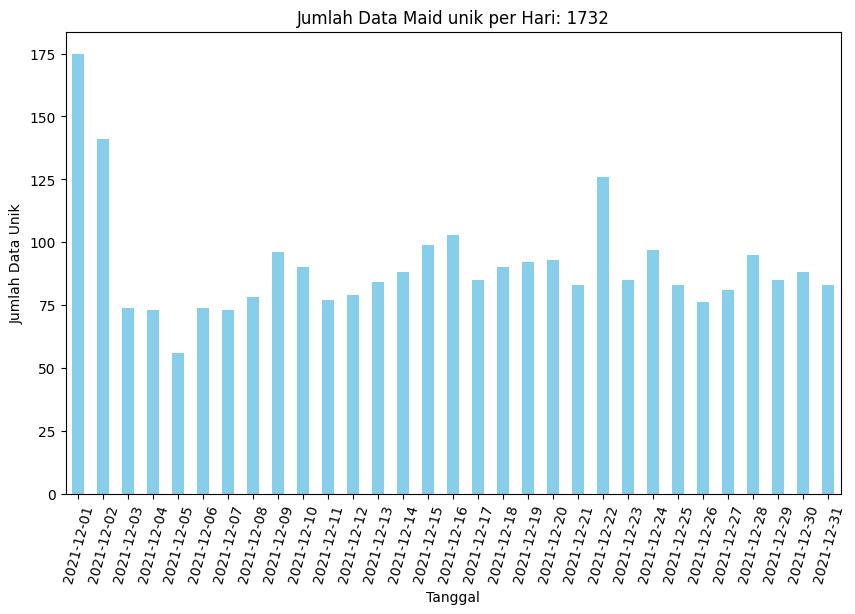

In [15]:
bar_chart(df3)

## All above preprocessing in one cell

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283358 entries, 0 to 283357
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   maid            283358 non-null  object 
 1   latitude        283358 non-null  float64
 2   longitude       283358 non-null  float64
 3   datetime_wib    283358 non-null  object 
 4   geometry        283358 non-null  object 
 5   Kelurahan/Desa  283358 non-null  object 
 6   Kecamatan       283358 non-null  object 
 7   Kabupaten       283358 non-null  object 
 8   tanggal         283358 non-null  object 
dtypes: float64(2), object(7)
memory usage: 19.5+ MB


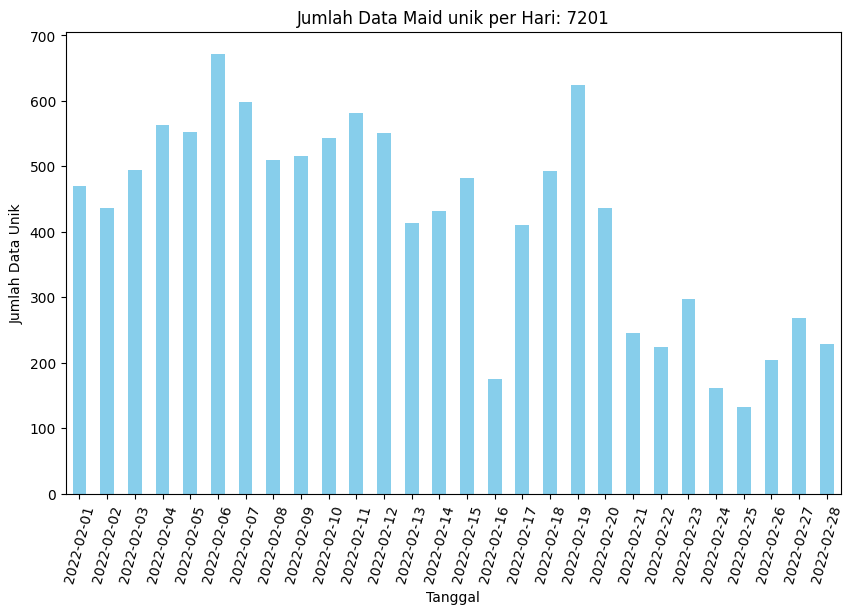

In [72]:
# before preprocessing
path = './DataGPS_Malioboro/filter1_malioboro_feb.csv'
df = pd.read_csv(path)
df = drop_columns(df)
df.info()
bar_chart(df)

Number of points dropped: 58043
<class 'pandas.core.frame.DataFrame'>
Int64Index: 91834 entries, 0 to 283356
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   maid            91834 non-null  object        
 1   latitude        91834 non-null  float64       
 2   longitude       91834 non-null  float64       
 3   datetime_wib    91834 non-null  datetime64[ns]
 4   geometry        91834 non-null  object        
 5   Kelurahan/Desa  91834 non-null  object        
 6   Kecamatan       91834 non-null  object        
 7   Kabupaten       91834 non-null  object        
 8   tanggal         91834 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 7.0+ MB


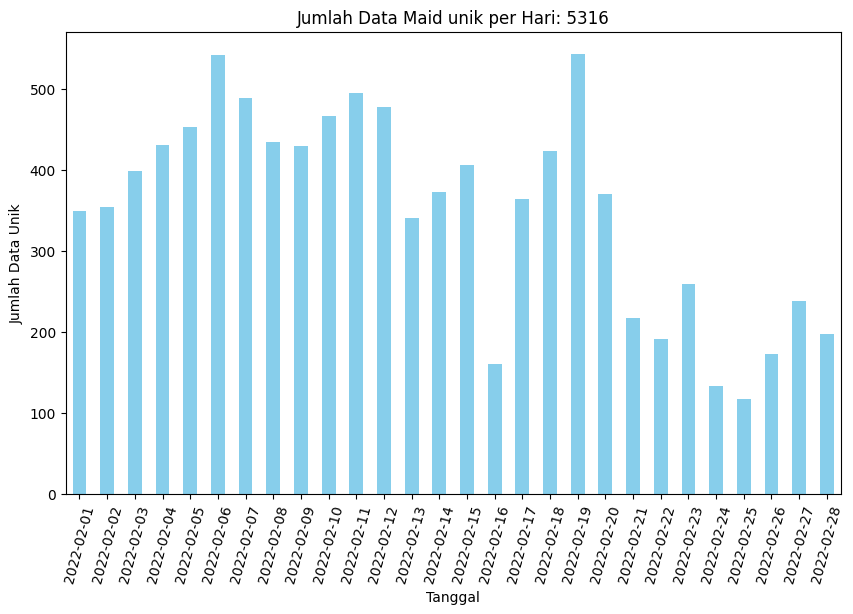

In [73]:
# after preprocessing
df_after = second_preprocessing(df)
df_after.info()
bar_chart(df_after)
filename = path.replace('filter1', 'filter2')

# save filter result to csv
if os.path.exists(path):
    df_after.to_csv(filename, index=False)
else:
    print(f"The file path {path} does not exist.")

In [41]:
a = df_after.sort_values(by=['maid', 'datetime_wib'])
a.head(20)

,maid,latitude,longitude,datetime_wib,geometry,Kelurahan/Desa,Kecamatan,Kabupaten,tanggal
119393,000ab7b4-b7b4-6f0b-2f80-b5be974e1ed6,-7.790489,110.366051,2022-05-22 13:54:09,POINT (110.36605072021484 -7.7904887),Kelurahan Sosromenduran,Gedongtengen,Kota Yogyakarta,2022-05-22
119406,000ab7b4-b7b4-6f0b-2f80-b5be974e1ed6,-7.792619,110.365690,2022-05-22 14:01:24,POINT (110.36569 -7.7926188),Kelurahan Sosromenduran,Gedongtengen,Kota Yogyakarta,2022-05-22
119408,000ab7b4-b7b4-6f0b-2f80-b5be974e1ed6,-7.792619,110.365690,2022-05-22 14:06:08,POINT (110.36569 -7.7926188),Kelurahan Sosromenduran,Gedongtengen,Kota Yogyakarta,2022-05-22
76650,000ab7b4-b7b4-6f0b-2f80-b5be974e1ed6,-7.793264,110.366791,2022-05-22 14:31:15,POINT (110.36679077148438 -7.793264),Kelurahan Suryatmajan,Danurejan,Kota Yogyakarta,2022-05-22
76683,000ab7b4-b7b4-6f0b-2f80-b5be974e1ed6,-7.793087,110.366074,2022-05-22 14:36:38,POINT (110.36607360839844 -7.793087),Kelurahan Suryatmajan,Danurejan,Kota Yogyakarta,2022-05-22
76691,000ab7b4-b7b4-6f0b-2f80-b5be974e1ed6,-7.793942,110.365690,2022-05-22 14:43:47,POINT (110.36569 -7.7939425),Kelurahan Suryatmajan,Danurejan,Kota Yogyakarta,2022-05-22
76785,000ab7b4-b7b4-6f0b-2f80-b5be974e1ed6,-7.793068,110.366051,2022-05-22 15:10:09,POINT (110.36605072021484 -7.793068),Kelurahan Suryatmajan,Danurejan,Kota Yogyakarta,2022-05-22
76813,000ab7b4-b7b4-6f0b-2f80-b5be974e1ed6,-7.793942,110.365690,2022-05-22 15:22:39,POINT (110.36569 -7.7939425),Kelurahan Suryatmajan,Danurejan,Kota Yogyakarta,2022-05-22
76881,000ab7b4-b7b4-6f0b-2f80-b5be974e1ed6,-7.793067,110.366020,2022-05-22 15:44:42,POINT (110.36602020263672 -7.793067),Kelurahan Suryatmajan,Danurejan,Kota Yogyakarta,2022-05-22
76908,000ab7b4-b7b4-6f0b-2f80-b5be974e1ed6,-7.793047,110.366096,2022-05-22 15:50:54,POINT (110.36609649658205 -7.793047),Kelurahan Suryatmajan,Danurejan,Kota Yogyakarta,2022-05-22
